# Business Understanding

## Project Domain

Kesehatan / HealthTech — fokus pada prediksi penyakit tiroid secara dini menggunakan data klinis pasien dan teknologi kecerdasan buatan (AI). Dengan memanfaatkan model pembelajaran mesin, dokter atau pasien dapat mengetahui kemungkinan gangguan tiroid tanpa pemeriksaan laboratorium yang mahal atau invasif.

## Problem Statements

Diagnosis penyakit tiroid seringkali membutuhkan tes laboratorium yang mahal dan tidak selalu tersedia di daerah terpencil. Selain itu, diagnosis dini sangat penting untuk mencegah komplikasi lebih lanjut. Namun, belum banyak solusi mobile yang praktis untuk membantu skrining dini berbasis data klinis sederhana.



## Goals

Mengembangkan model klasifikasi menggunakan Artificial Neural Network (ANN) untuk memprediksi kondisi tiroid (sehat / tidak sehat).

Mengintegrasikan model tersebut ke dalam aplikasi Android agar mudah digunakan oleh masyarakat atau tenaga medis.

## Solution Statements

Solusi yang dikembangkan adalah sistem prediksi penyakit tiroid berbasis machine learning yang dilatih dari dataset medis. Model tersebut kemudian diubah menjadi format TFLite dan diintegrasikan ke dalam aplikasi Android. Aplikasi ini memungkinkan pengguna memasukkan data seperti usia, jenis kelamin, riwayat merokok, fungsi tiroid, dan parameter lainnya, lalu menerima hasil prediksi secara real-time.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"edwinfajarr","key":"c6d321ac59ac3879408e08cd3eccdac1"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d abuchionwuegbusi/thyroid-cancer-recurrence-prediction

Dataset URL: https://www.kaggle.com/datasets/abuchionwuegbusi/thyroid-cancer-recurrence-prediction
License(s): apache-2.0
  0% 0.00/3.03k [00:00<?, ?B/s]
100% 3.03k/3.03k [00:00<00:00, 14.0MB/s]


In [4]:
!mkdir thyroid-cancer-recurrence-prediction
!unzip thyroid-cancer-recurrence-prediction.zip -d thyroid-cancer-recurrence-prediction

Archive:  thyroid-cancer-recurrence-prediction.zip
  inflating: thyroid-cancer-recurrence-prediction/Thyroid_Diff.csv  


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras import models, layers

import pickle


## Exploratory Data Analysis

In [7]:
df = pd.read_csv('Thyroid_Diff.csv')

In [8]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [9]:
print(df.dtypes)

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object


In [10]:
for col in df.select_dtypes('object').columns:
    print(f"{col} : {df[col].unique()}")

Gender : ['F' 'M']
Smoking : ['No' 'Yes']
Hx Smoking : ['No' 'Yes']
Hx Radiothreapy : ['No' 'Yes']
Thyroid Function : ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Physical Examination : ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy : ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology : ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Focality : ['Uni-Focal' 'Multi-Focal']
Risk : ['Low' 'Intermediate' 'High']
T : ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N : ['N0' 'N1b' 'N1a']
M : ['M0' 'M1']
Stage : ['I' 'II' 'IVB' 'III' 'IVA']
Response : ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']
Recurred : ['No' 'Yes']


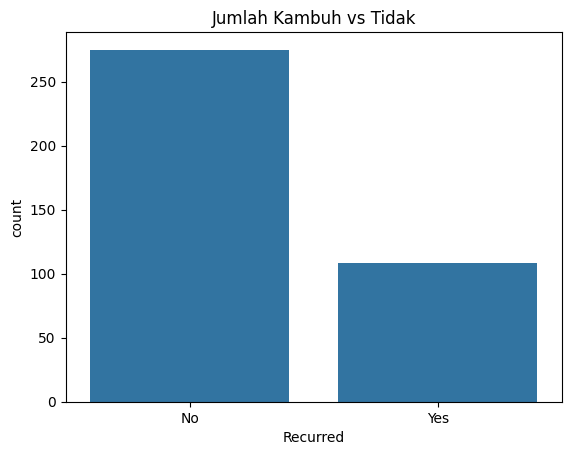

In [11]:
sns.countplot(x='Recurred', data=df)
plt.title('Jumlah Kambuh vs Tidak')
plt.show()

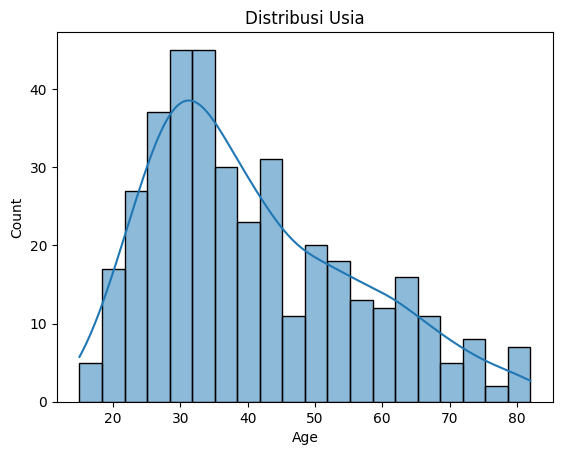

In [12]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Usia')
plt.show()

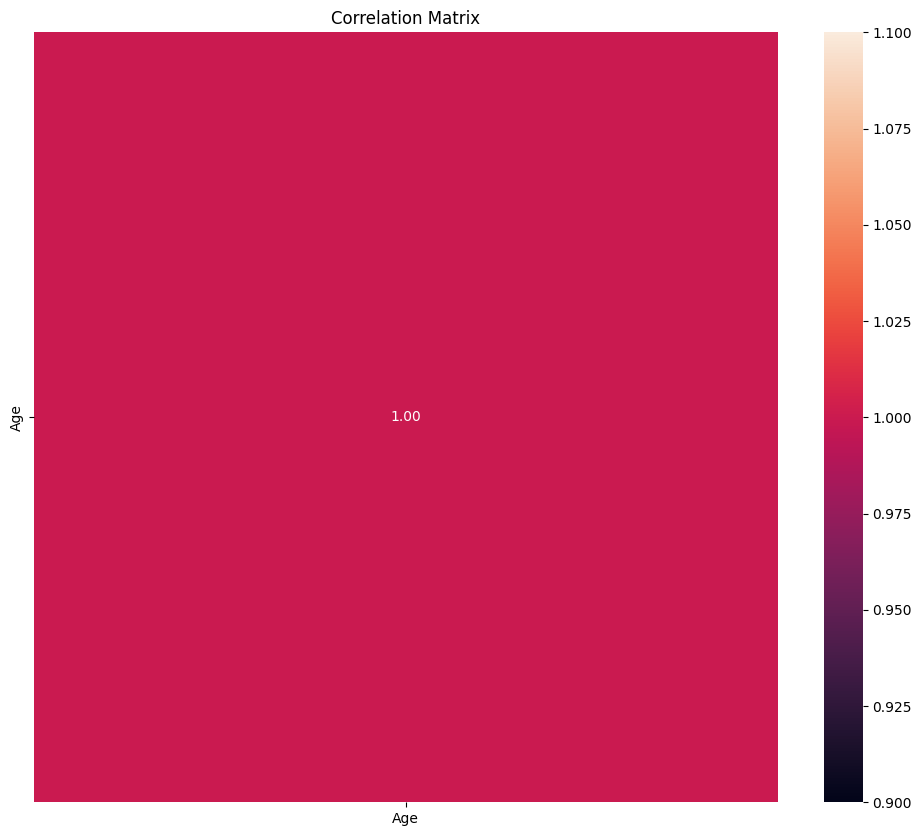

In [13]:
plt.figure(figsize=(12,10))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

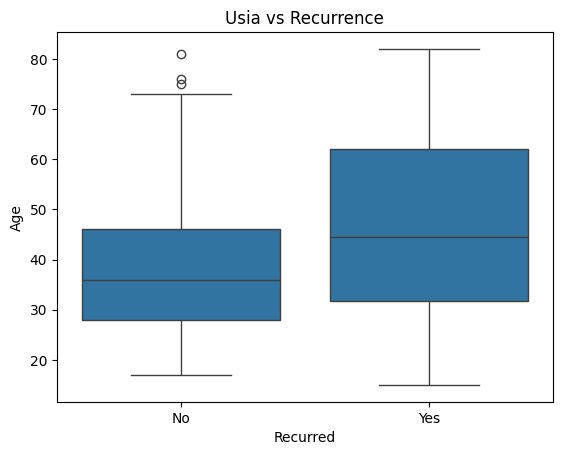

In [14]:
sns.boxplot(x='Recurred', y='Age', data=df)
plt.title('Usia vs Recurrence')
plt.show()

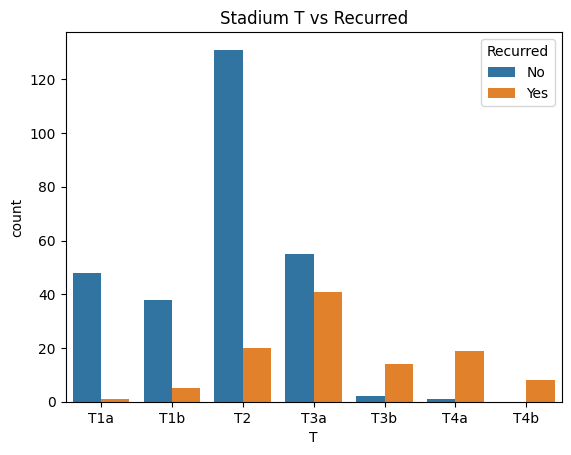

In [15]:
sns.countplot(x='T', hue='Recurred', data=df)
plt.title('Stadium T vs Recurred')
plt.show()

# Data Preparation

In [16]:
X = df.drop('Recurred', axis=1)
y = df['Recurred']


In [17]:
le_dict = {}

for col in X.select_dtypes('object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le


In [18]:
if y.dtype == 'object':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)

In [19]:
print(X.isnull().sum())
X.fillna(X.median(numeric_only=True), inplace=True)

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
dtype: int64


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# Modeling

In [44]:
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

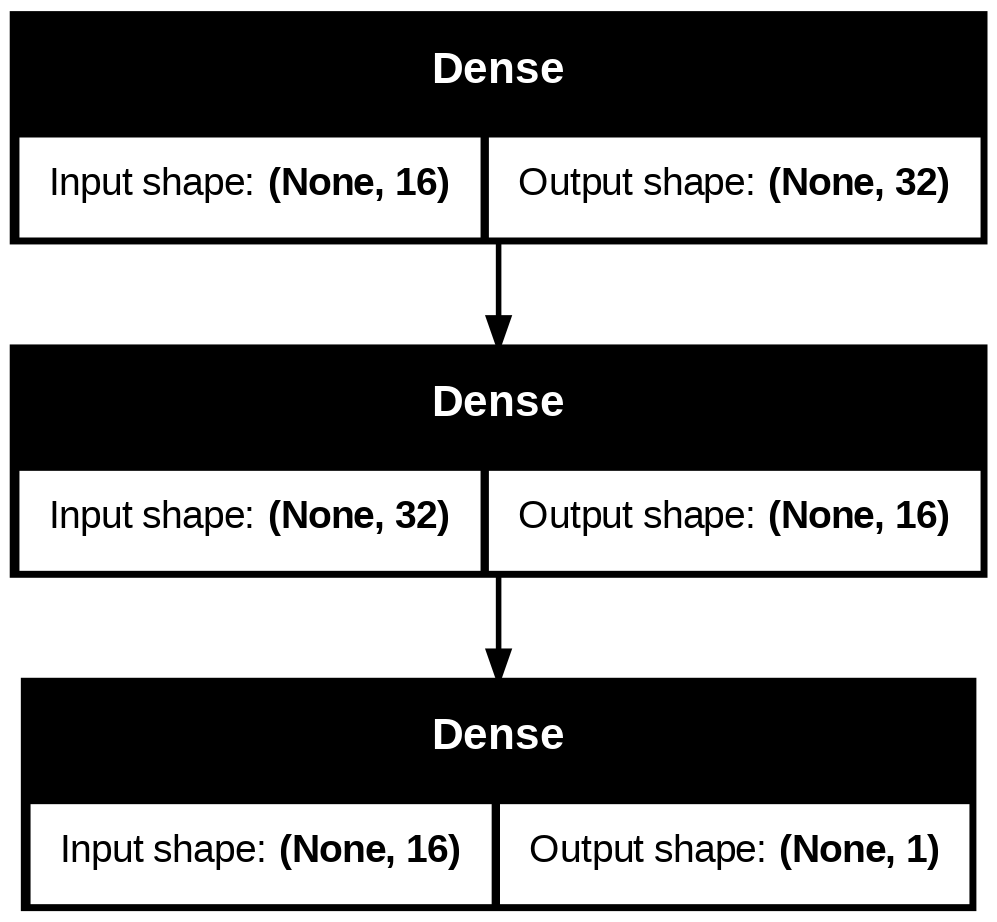

In [47]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [59]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 0.9444 - val_loss: 0.2278
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 0.9444 - val_loss: 0.2251
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0152 - val_accuracy: 0.9444 - val_loss: 0.2305
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 0.9444 - val_loss: 0.2289
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 0.9444 - val_loss: 0.2273
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 0.9444 - val_loss: 0.2291
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 0.9444 - val_loss: 0.2332
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 0.9444 - v

# Evaluation

In [60]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi Test Set: {acc*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9295 - loss: 0.3100
Akurasi Test Set: 93.04%


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        83
           1       0.88      0.88      0.88        32

    accuracy                           0.93       115
   macro avg       0.91      0.91      0.91       115
weighted avg       0.93      0.93      0.93       115



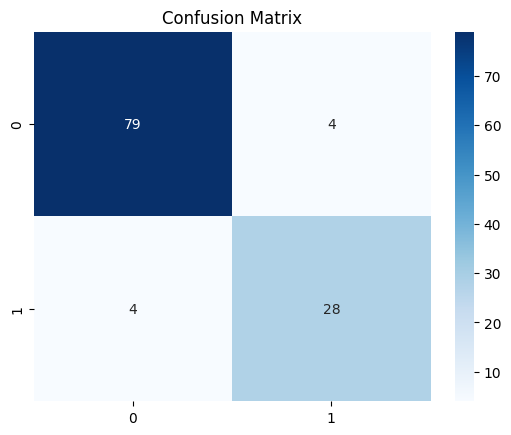

In [61]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Deployment

## Model Simulation

In [62]:
for col in df.select_dtypes('object').columns:
    print(f"{col} : {df[col].unique()}")

Gender : ['F' 'M']
Smoking : ['No' 'Yes']
Hx Smoking : ['No' 'Yes']
Hx Radiothreapy : ['No' 'Yes']
Thyroid Function : ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Physical Examination : ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy : ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology : ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Focality : ['Uni-Focal' 'Multi-Focal']
Risk : ['Low' 'Intermediate' 'High']
T : ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N : ['N0' 'N1b' 'N1a']
M : ['M0' 'M1']
Stage : ['I' 'II' 'IVB' 'III' 'IVA']
Response : ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']
Recurred : ['No' 'Yes']


In [63]:
input_dict = {
    'Age': 35,
    'Gender': 'F',
    'Smoking' :1,
    'Hx Smoking': 0,
    'Hx Radiothreapy': 0,
    'Thyroid Function': 0,
    'Physical Examination': 2,
    'Adenopathy': 1,
    'Pathology': 1,
    'Focality': 1,
    'Risk': 2,
    'T': 0,
    'N': 2,
    'M': 0,
    'Stage': 5,
    'Response':3
}

In [64]:
input_df = pd.DataFrame([input_dict])

In [65]:
for col in input_df.select_dtypes('object').columns:
    le = le_dict[col]
    input_df[col] = le.transform(input_df[col])

In [66]:
feature_names = X.columns

In [67]:
X_input = input_df[feature_names]

In [68]:
X_input_scaled = scaler.transform(X_input)

In [69]:
pred_proba = model.predict(X_input_scaled)[0][0]
pred_label = (pred_proba > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [70]:
print(f"Prediksi: {'Penderita Tiroid' if pred_label == 1 else 'Sehat'}")
print(f"Probabilitas: {pred_proba:.4f}")

Prediksi: Penderita Tiroid
Probabilitas: 1.0000


## Save Model

In [71]:
#download scaler.pkl
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [72]:
model.save('./thyroid_model.h5')

In [73]:
model = tf.keras.models.load_model('./thyroid_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
with open("thyroid_model.tflite", "wb") as f:
    f.write(tflite_model)
print("Model berhasil dikonversi dan disimpan sebagai thyroid_model.tflite")

Saved artifact at '/tmp/tmpsqyt21ta'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135378045124240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135378045123856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135378045121360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135378045120208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135378045124432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135378045122704: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasil dikonversi dan disimpan sebagai thyroid_model.tflite
